In [1]:
import pandas as pd 
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

### Получаем необходимый путь

In [3]:
file_path = os.getcwd()
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(file_path)))

In [4]:
SHARED_DIR = os.path.join(BASE_DIR, 'shared')
HOMEWORKS_DIR = os.path.join(SHARED_DIR, 'homeworks')
PYTHON_MINIPROJECTS_DIR = os.path.join(HOMEWORKS_DIR, 'python_ds_miniprojects')
MINIPROJECT_6_DIR = os.path.join(PYTHON_MINIPROJECTS_DIR, '6')

In [5]:
MINIPROJECT_6_DIR

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/shared/homeworks/python_ds_miniprojects/6'

In [6]:
os.listdir(MINIPROJECT_6_DIR)

['ads_data.csv', 'ads_clients_data.csv']

In [7]:
path_to_files_dict = {}
for file_name in os.listdir(MINIPROJECT_6_DIR):
    path_to_file = os.path.abspath(os.path.join(MINIPROJECT_6_DIR, file_name))
    path_to_files_dict['{}'.format(file_name.rsplit('.')[0])] = path_to_file

In [8]:
path_to_files_dict

{'ads_data': '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/shared/homeworks/python_ds_miniprojects/6/ads_data.csv',
 'ads_clients_data': '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv'}

### Загружаем датафреймы

In [33]:
ads_data_df = pd.read_csv(path_to_files_dict['ads_data'], parse_dates = ['date', 'time'])
ads_clients_data_df = pd.read_csv(path_to_files_dict['ads_clients_data'], parse_dates = ['date', 'create_date'])

In [34]:
ads_data_df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [35]:
ads_clients_data_df.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [69]:
print(f'ads_data_df shape: {ads_data_df.shape}', f'ads_clients_data_df shape: {ads_clients_data_df.shape}', sep='\n')

ads_data_df shape: (1000000, 11)
ads_clients_data_df shape: (122078, 4)


### Посчитаем среднее количество показов и кликов по объявлениям. 

In [12]:
ads_data_df.describe()

,ad_id,client_union_id,campaign_union_id,ad_cost,has_video,target_audience_count
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,94521.639602,91435.486997,94368.663159,196.360579,0.005347,8.395493e+06
std,32391.671947,37019.314862,32316.740365,33.248420,0.072927,1.601787e+07
min,2.000000,1.000000,1.000000,33.200000,0.000000,1.090000e+02
25%,107729.000000,107076.000000,107728.000000,190.900000,0.000000,2.239200e+04
50%,112583.000000,111818.000000,112260.000000,208.700000,0.000000,3.275600e+04
75%,112583.000000,111818.000000,112260.000000,210.100000,0.000000,2.512711e+06
max,122078.000000,122078.000000,122078.000000,227.500000,1.000000,1.548271e+08


In [13]:
ads_data_df.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [14]:
ads_data_df.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [15]:
# группируем по номеру объявления и типу события
# рассчитываем количество выполнения того или инного события (кликов, показов)
# получаем сводную таблицу, строки - имя объявления, столбцы - типы событий (клик/ показ), значения - количество выполнений события
# т.к. действие предыдущего шага приводит к тому, что в каких то объявлениях отстутствующие события заполняются NaN, заменяем NaN на 0

click_view_pivot = ads_data_df.groupby(['ad_id', 'event'], as_index=False) \
                                .agg({'ad_cost': 'count'}) \
                                .rename(columns={'ad_cost': 'event_number'}) \
                                .pivot(index='ad_id', columns='event', values='event_number') \
                                .fillna(0) 

In [16]:
click_view_pivot

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [17]:
clicks_mean = click_view_pivot.click.mean().round()
views_mean = click_view_pivot.view.mean().round()
print(f'clicks_mean: {clicks_mean}', f'views_mean: {views_mean}', sep='\n')

clicks_mean: 113.0
views_mean: 923.0


### Посмотрим на распределение показов объявлений.
##### По оси x – число показов
##### По оси y – доля объявлений с такими показами

#### Прологарифмируем число показов

In [18]:
views_event_number = ads_data_df.groupby(['ad_id', 'event'], as_index=False) \
                                .agg({'ad_cost': 'count'}) \
                                .rename(columns={'ad_cost': 'event_number'}) \
                                .query("event == 'view'")
views_event_number

,ad_id,event,event_number
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


In [19]:
log_views = np.log(views_event_number.event_number)

#### Построим график распределения

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


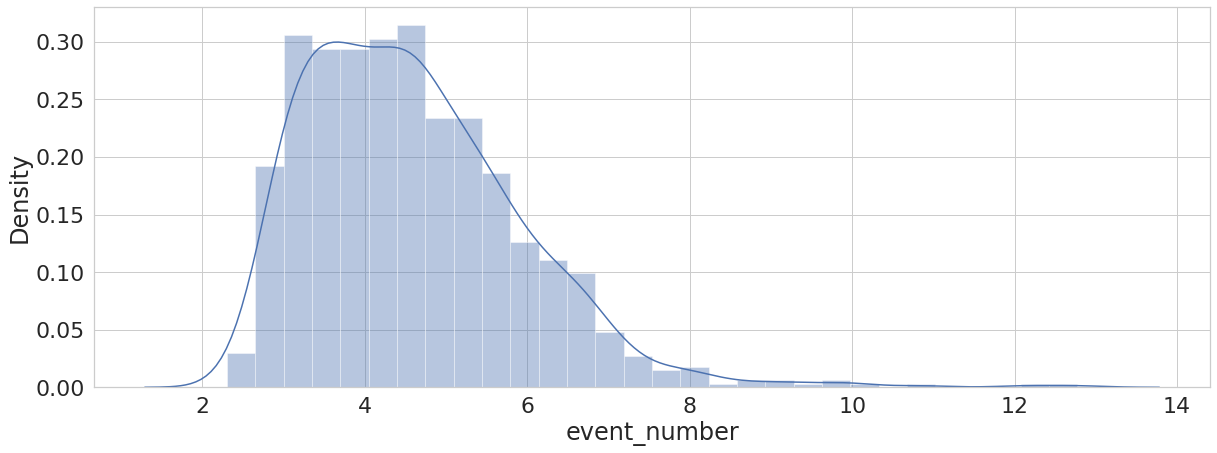

In [20]:
sns.distplot(log_views)

### Определим значение скользящего среднего за 6 апреля 2019 года?

#### Найдем среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее).

In [21]:
views_number_df = ads_data_df.query("event == 'view'").groupby(['date', 'ad_id'], as_index=False) \
                                                        .agg({'event': 'count'}) \
                                                        .rename(columns={'event': 'views_number'}) \

views_number_df             

,date,ad_id,views_number
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17
...,...,...,...
1926,2019-04-06,119161,14
1927,2019-04-06,119175,27
1928,2019-04-06,121309,111
1929,2019-04-06,121820,11


In [22]:
views_number_per_day_mean = views_number_df.groupby('date') \
                                            .agg({'views_number': 'mean'})
views_number_per_day_mean

,views_number
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


#### Посчитаем скользящее среднее по полученному результату с окном в 2 элемента.

In [23]:
viewed_ads_SMA = views_number_per_day_mean.views_number \
                                            .rolling(2) \
                                            .mean()
viewed_ads_SMA

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
Name: views_number, dtype: float64

In [24]:
views_SMA_2019_04_06 = viewed_ads_SMA.reset_index().query("date == '2019-04-06'").views_number.sum().round()

In [25]:
int(views_SMA_2019_04_06)

598

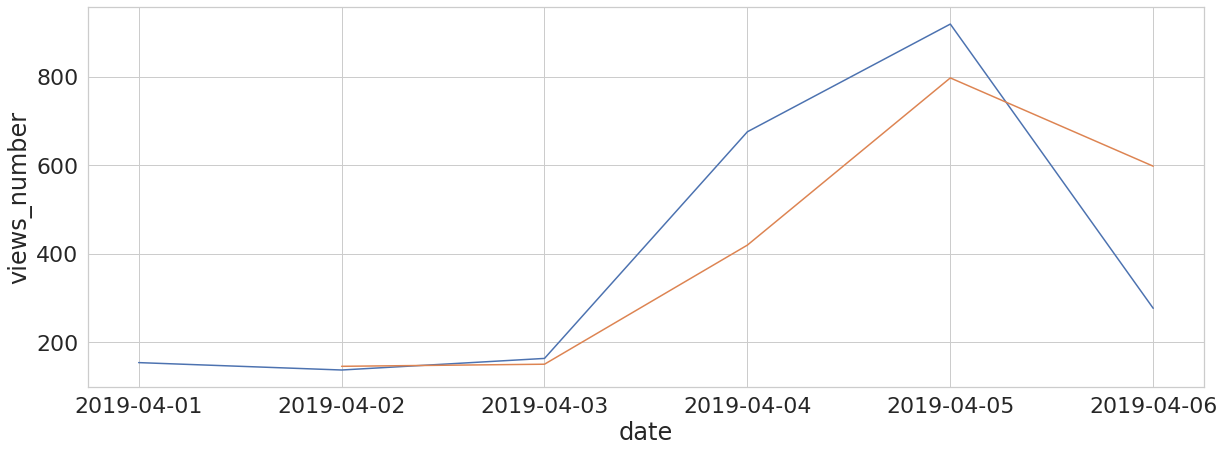

In [26]:
sns.lineplot(data=views_number_per_day_mean.reset_index(), x="date", y="views_number")
sns.lineplot(data=viewed_ads_SMA.reset_index(), x="date", y="views_number")

In [32]:
abs(views_number_per_day_mean.views_number - viewed_ads_SMA).sort_values(ascending=False).head(1)

date
2019-04-06    320.993475
Name: views_number, dtype: float64

### Cреднее число дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом

#### Объединим данные рекламы с данными о рекламных клиентах

In [67]:
ads_data_with_clients = ads_data_df.merge(ads_clients_data_df, on=['client_union_id'])
ads_data_with_clients

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04


#### Найдем среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date)

In [58]:
# Отбираем данные из ads_data_with_clients по датам. Берем только даты создания первых объялений.
client_dates_df = ads_data_with_clients.groupby('client_union_id', as_index=False) \
                                        .agg({'date_x': 'min', 'create_date': 'min'}) \
                                        .rename(columns={'date_x': 'first_ad_date'})
client_dates_df

,client_union_id,first_ad_date,create_date
0,1,2019-04-01,2018-12-24
1,9,2019-04-03,2018-12-10
2,13,2019-04-02,2019-01-26
3,16,2019-04-03,2018-12-19
4,20,2019-04-02,2019-03-01
...,...,...,...
833,122004,2019-04-01,2019-01-24
834,122013,2019-04-04,2018-11-04
835,122023,2019-04-04,2018-11-29
836,122031,2019-04-05,2018-12-30


In [104]:
# Создадим колонку разницы между временем создания и первым запуском объявления
client_dates_df['timedelta_tostart_ad'] = client_dates_df['first_ad_date'] - client_dates_df['create_date']
client_dates_df.head()

,client_union_id,first_ad_date,create_date,timedelta_tostart_ad
0,1,2019-04-01,2018-12-24,98 days
1,9,2019-04-03,2018-12-10,114 days
2,13,2019-04-02,2019-01-26,66 days
3,16,2019-04-03,2018-12-19,105 days
4,20,2019-04-02,2019-03-01,32 days


In [62]:
# Находим среднее в колонке 'timedelta_tostart_ad'
client_dates_df.timedelta_tostart_ad.mean().days

124

### Определим CR по количеству созданных рекламных объявлений к числу созданных рекламных кабинетов

#### Количество клиентов, кто сделал рекламное объявление в промежутке до 365 дней:

In [101]:
period_of_interests = pd.Timedelta(365, unit='day')
ad_made_clients_number = client_dates_df.query("timedelta_tostart_ad < @period_of_interests") \
                                        .shape[0]
ad_made_clients_number

838

#### Количество клиентов, кто создал рекламный кабинет:

In [89]:
account_made_clients_number = ads_clients_data_df.client_union_id.nunique()
account_made_clients_number

122078

#### Расчет конверсии (кто создал объявление / кто создал кабинет * 100 ) 

In [100]:
ad_CR = ad_made_clients_number / account_made_clients_number
ad_CR = round(ad_CR * 100, 2) 
ad_CR

0.69

### Определим, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

#### Разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
##### Для этого создадим временные промежутки с помощью pd.to_timedelta(). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365].

In [114]:
client_dates_df['time_intervals'] = pd.cut(
                                            client_dates_df.timedelta_tostart_ad, 
                                            bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='day'), 
                                            labels=['0-30 days', '30-90 days', '90-180 days', '180-365 days'])

##### Выберем клиентов за период 0-30 дней:

In [128]:
# Вариант 1
clients_number_0_30_1 = client_dates_df.time_intervals.value_counts()['0-30 days']
# Вариант 2
clients_number_0_30 = client_dates_df.groupby('time_intervals', as_index=False) \
                                        .agg({'client_union_id': 'nunique'}) \
                                        .query("time_intervals == '0-30 days'") \
                                        .client_union_id.sum()

print(f'Ответ первого варианта: {clients_number_0_30_1}', f'Ответ второго варианта: {clients_number_0_30}', sep='\n')

Ответ первого варианта: 11
Ответ второго варианта: 11


### Построим распределение количества уникальных клиентов по категориям времени (интервалам):

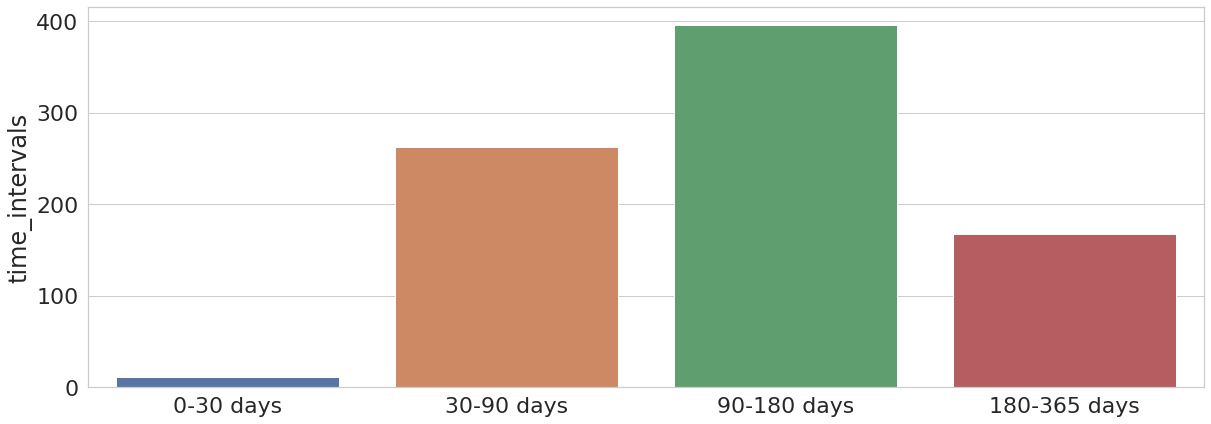

In [146]:
sns.barplot(x=client_dates_df.time_intervals.value_counts().index, y=client_dates_df.time_intervals.value_counts())

In [139]:
clients_intervals_df = client_dates_df.groupby('time_intervals', as_index=False) \
                                        .agg({'client_union_id': 'nunique'}) \
                                        .rename(clumns={'client_union_id': 'clients_number'})

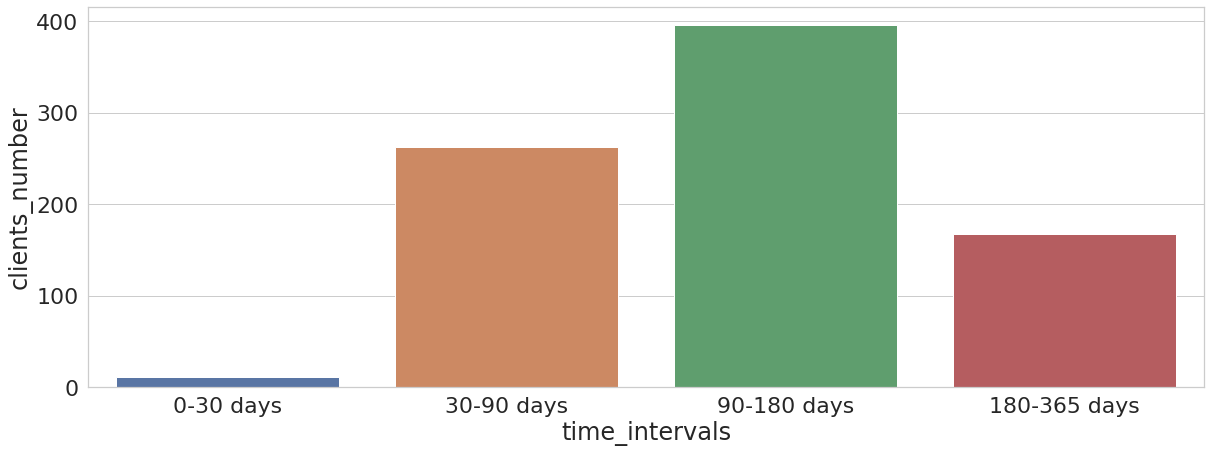

In [140]:
sns.barplot(x=clients_intervals_df.time_intervals, y=clients_intervals_df.clients_number)

90-180 days     396
30-90 days      263
180-365 days    168
0-30 days        11
Name: time_intervals, dtype: int64